In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras import backend as k
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv2D, MaxPooling2D, Dense, Conv1D, Dropout
from keras.layers import MaxPooling1D, Flatten, Embedding, LSTM
from keras.models import Sequential
import spacy
import nltk
import en_core_web_md
#nlp = spacy.load('en_core_web_sm')

In [4]:
tweet_full_train_df = pd.read_csv('input/train.csv')
tweet_full_test_df = pd.read_csv('input/test.csv')

In [5]:
tweet_full_train_df.head()
train_test_size = 0.2

vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'),
                            lowercase=True, min_df=3, max_df=0.9, max_features=5000)

wv_data = vectorizer.fit_transform(tweet_full_train_df['text'].values)
wv_target = tweet_full_train_df['target'].values

data_train, data_validation, target_train, target_validation = train_test_split(
    tweet_full_train_df['text'].values ,tweet_full_train_df['target'].values,test_size=train_test_size)

#data_train, data_validation, target_train, target_validation = train_test_split(
#    wv_data ,tweet_full_train_df['target'].values,test_size=train_test_size)

In [6]:
place = 10
print(data_train[place],target_train[place])
#print(target_train[2])
#print(wv_data[0])

I'm loving this classic barn shot! We may or may not have got electrocuted got stung a few times and stepped in... http://t.co/X6aSGRjsWC 1


so there are many layers of data manipulation to try, one is just the bag of words model
I'm gonna follow the intro tutorial here
https://nlpforhackers.io/keras-intro/
and then start looking into other models and testing those out

In [7]:
#raise ValueError

# this download function is useful if I ever need to download another 
#nltk.download()
vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'),
                            lowercase=True, min_df=3, max_df=0.9, max_features=5000)

data_train_cv = vectorizer.fit_transform(data_train)
data_valid_cv = vectorizer.transform(data_validation)


In [8]:
def simple_cv_model():
    # just a simple model
    
    model = Sequential()
    
    model.add(Dense(units=500, activation='relu', input_dim=len(vectorizer.get_feature_names())))
    model.add(Dense(units=1, activation='sigmoid'))
    
    return model

In [9]:
simple_countvec = simple_cv_model()
simple_countvec.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#simple_countvec.summary()
print(len(vectorizer.get_feature_names()))
print(data_train_cv.shape)
print(target_train.shape)
#print(data_valid_cv.shape)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
3669
(6090, 3669)
(6090,)


In [10]:
# train the model
simple_countvec.fit(data_train_cv[:-100],target_train[:-100],
          epochs=2, batch_size=128, verbose=1,
         validation_data=(data_valid_cv,target_validation))


Train on 5990 samples, validate on 1523 samples
Epoch 1/2
5990/5990 [==============================] - ETA: 1:42 - loss: 0.6970 - accuracy: 0.45 - ETA: 24s - loss: 0.6878 - accuracy: 0.5898 - ETA: 8s - loss: 0.6717 - accuracy: 0.657 - ETA: 4s - loss: 0.6525 - accuracy: 0.69 - ETA: 2s - loss: 0.6365 - accuracy: 0.70 - ETA: 1s - loss: 0.6162 - accuracy: 0.72 - ETA: 0s - loss: 0.5983 - accuracy: 0.73 - ETA: 0s - loss: 0.5791 - accuracy: 0.74 - ETA: 0s - loss: 0.5691 - accuracy: 0.74 - 3s 472us/step - loss: 0.5669 - accuracy: 0.7494 - val_loss: 0.4587 - val_accuracy: 0.8004
Epoch 2/2
5990/5990 [==============================] - ETA: 0s - loss: 0.4900 - accuracy: 0.78 - ETA: 0s - loss: 0.3859 - accuracy: 0.84 - ETA: 0s - loss: 0.3686 - accuracy: 0.84 - ETA: 0s - loss: 0.3675 - accuracy: 0.84 - ETA: 0s - loss: 0.3574 - accuracy: 0.85 - ETA: 0s - loss: 0.3590 - accuracy: 0.84 - ETA: 0s - loss: 0.3555 - accuracy: 0.85 - ETA: 0s - loss: 0.3586 - accuracy: 0.85 - ETA: 0s - loss: 0.3551 - accura

In [9]:
print(type(data_train_cv[0]))

<class 'scipy.sparse.csr.csr_matrix'>


In [11]:
# now to try out a CNN
# following the nlpforhackers keras-intro

word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}
tokenize = vectorizer.build_tokenizer()
preprocess = vectorizer.build_preprocessor()

def to_sequence(tokenizer, preprocessor, index, text):
    
    words = tokenizer(preprocessor(text))
    #print(words)
    indexes = [index[word] for word in words if word in index]
    
    return indexes

print(to_sequence(tokenize, preprocess, word2idx, "this is an important test!"))
data_train_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in data_train]
data_test_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in data_validation]
print(data_train_sequences[0])

# but now we pad so that everything is the same length
MAX_SEQ_LENGTH = len(max(data_train_sequences, key=len))
if len(max(data_test_sequences, key=len)) > MAX_SEQ_LENGTH:
    MAX_SEQ_LENGTH = len(max(data_test_sequences, key=len))

print('MAX_SEQ_LENGTH=',MAX_SEQ_LENGTH)
N_FEATURES = len(vectorizer.get_feature_names())
print('N_FEATURES=',N_FEATURES)
data_train_sequences = pad_sequences(data_train_sequences, maxlen=MAX_SEQ_LENGTH, value=N_FEATURES)
data_test_sequences = pad_sequences(data_test_sequences, maxlen=MAX_SEQ_LENGTH, value=N_FEATURES)
print(data_train_sequences[0])

#data_validation_sequences = 


[3192]
[776, 1737, 2962]
MAX_SEQ_LENGTH= 21
N_FEATURES= 3669
[3669 3669 3669 3669 3669 3669 3669 3669 3669 3669 3669 3669 3669 3669
 3669 3669 3669 3669  776 1737 2962]


In [21]:
def conv_model():
    
    model = Sequential()
    
    model.add(Embedding(len(vectorizer.get_feature_names()) + 1, 64,
                       input_length=MAX_SEQ_LENGTH))
    
    model.add(Conv1D(64, 5, activation='relu',padding='same'))
    model.add(MaxPooling1D(5,padding='same'))
    model.add(Dropout(0.25))
    model.add(Conv1D(64,5,activation='relu',padding='same'))
    model.add(MaxPooling1D(5,padding='same'))
    
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    return model

sim_conv_model = conv_model()

sim_conv_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(sim_conv_model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 21, 64)            234880    
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 21, 64)            20544     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 64)             0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 5, 64)             20544     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 1, 64)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)               

Train on 5990 samples, validate on 100 samples
Epoch 1/7
5990/5990 [==============================] - ETA: 3s - loss: 0.6939 - accuracy: 0.44 - ETA: 0s - loss: 0.6874 - accuracy: 0.54 - 0s 81us/step - loss: 0.6832 - accuracy: 0.5551 - val_loss: 0.6707 - val_accuracy: 0.5700
Epoch 2/7
5990/5990 [==============================] - ETA: 0s - loss: 0.6572 - accuracy: 0.60 - ETA: 0s - loss: 0.6608 - accuracy: 0.57 - 0s 19us/step - loss: 0.6512 - accuracy: 0.6088 - val_loss: 0.6144 - val_accuracy: 0.6800
Epoch 3/7
5990/5990 [==============================] - ETA: 0s - loss: 0.6173 - accuracy: 0.67 - ETA: 0s - loss: 0.5929 - accuracy: 0.70 - 0s 20us/step - loss: 0.5628 - accuracy: 0.7311 - val_loss: 0.4684 - val_accuracy: 0.7500
Epoch 4/7
5990/5990 [==============================] - ETA: 0s - loss: 0.4843 - accuracy: 0.80 - ETA: 0s - loss: 0.4302 - accuracy: 0.82 - 0s 20us/step - loss: 0.4013 - accuracy: 0.8339 - val_loss: 0.3140 - val_accuracy: 0.8900
Epoch 5/7
5990/5990 [====================

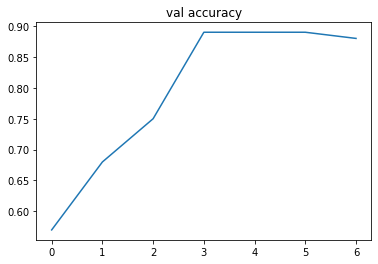

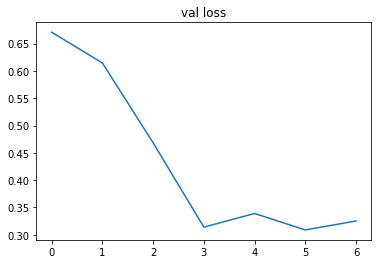

In [24]:
sim_conv_model = conv_model()

sim_conv_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

sim_conv_model.fit(data_train_sequences[:-100],target_train[:-100],
                  epochs=7, batch_size=512, verbose=1,
                  validation_data=(data_train_sequences[-100:],target_train[-100:]))

plt.plot(sim_conv_model.history.history['val_accuracy'])
plt.title('val accuracy')
plt.show()

plt.plot(sim_conv_model.history.history['val_loss'])
plt.title('val loss')
plt.show()

In [25]:
scores = sim_conv_model.evaluate(data_test_sequences, target_validation, verbose=1)
print('Accuracy:', scores[1])

1523/1523 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - 0s 112us/step
Accuracy: 0.787261962890625


<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x0000016F0499EB00>>


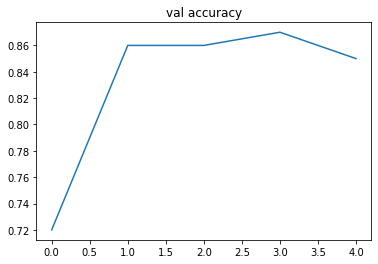

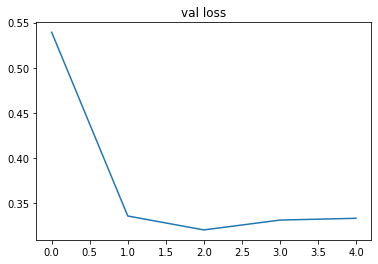

In [15]:
# now we build the LSTM network

def lstm_model():
    
    model = Sequential()
    
    model.add(Embedding(len(vectorizer.get_feature_names()) +1, 64, input_length=MAX_SEQ_LENGTH))
    
    model.add(LSTM(64))
    model.add(Dense(units=1, activation='sigmoid'))
    
    return model

sim_lstm_mod = lstm_model()
sim_lstm_mod.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(sim_lstm_mod.summary)

sim_lstm_mod.fit(data_train_sequences[:-100],target_train[:-100],
                epochs=5, batch_size=128, verbose=0,
                validation_data=(data_train_sequences[-100:],target_train[-100:]))

plt.plot(sim_lstm_mod.history.history['val_accuracy'])
plt.title('val accuracy')
plt.show()

plt.plot(sim_lstm_mod.history.history['val_loss'])
plt.title('val loss')
plt.show()

In [16]:
scores = sim_lstm_mod.evaluate(data_test_sequences, target_validation, verbose=1)
print('Accuracy:', scores[1])

1523/1523 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 497us/step
Accuracy: 0.7885751724243164


In [29]:
# now to  transfer learning

# spaCy embeddings

#nlp = spacy.load('en_core_web_md')
nlp = en_core_web_md.load()

EMBEDDINGS_LEN = len(nlp.vocab['apple'].vector)
print('EMBEDDINGS_LEN=',EMBEDDINGS_LEN)

embeddings_index = np.zeros((len(vectorizer.get_feature_names()) + 1, EMBEDDINGS_LEN))
for word, idx in word2idx.items():
    try:
        embedding = nlp.vocab[word].vector
        embeddings_index[idx] = embedding
    except:
        pass

EMBEDDINGS_LEN= 300


In [34]:
def spacy_trans_model():
    
    model = Sequential()
    
    model.add(Embedding(len(vectorizer.get_feature_names()) +1,
                       EMBEDDINGS_LEN,
                       weights=[embeddings_index],
                       input_length=MAX_SEQ_LENGTH,
                       trainable=False))
    model.add(LSTM(300))
    model.add(Dense(units=1, activation='sigmoid'))
    
    return model

simple_spacy_model = spacy_trans_model()
simple_spacy_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(simple_spacy_model.summary())

simple_spacy_model.fit(data_train_sequences[:-100],target_train[:-100],
                        epochs=5, batch_size=128, #verbose=1,
                        validation_data=(data_train_sequences[-100:],target_train[-100:]))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 22, 300)           1104000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 301       
Total params: 1,825,501
Trainable params: 721,501
Non-trainable params: 1,104,000
_________________________________________________________________
None
Train on 5990 samples, validate on 100 samples
Epoch 1/5
5990/5990 [==============================] - ETA: 18s - loss: 0.6942 - accuracy: 0.515 - ETA: 6s - loss: 0.6691 - accuracy: 0.554 - ETA: 4s - loss: 0.6429 - accuracy: 0.60 - ETA: 3s - loss: 0.6207 - accuracy: 0.64 - ETA: 2s - loss: 0.5983 - accuracy: 0.66 - ETA: 2s - loss: 0.5742 - accuracy: 0.69 - ETA: 1

In [35]:
scores = simple_spacy_model.evaluate(data_test_sequences, target_validation, verbose=1)
print('Accuracy:',scores[1])

1523/1523 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 387us/step
Accuracy: 0.784635603427887


In [ ]:
# transfer learning with GloVe embeddings

